## $\color{orange}\textrm{Import Libraries}$

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

## $\color{orange}\textrm{Get the website}$

In [2]:
website = 'https://www.cars24.com/buy-used-car?f=make%3A%3D%3Ahonda&sort=bestmatch&serveWarrantyCount=true&listingSource=Homepage_Filters&storeCityId=2378'

## $\color{orange}\textrm{Make the soup}$

In [3]:
# Set up Chrome options
chrome_options = Options()

# Initialize the WebDriver using webdriver-manager
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Open the URL
driver.get(website)

# Scroll to the bottom of the page to load all cars
scroll_pause_time = 2  # You can adjust this value

last_height = driver.execute_script("return document.body.scrollHeight")

while True:
    # Scroll down to the bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load the page
    time.sleep(scroll_pause_time)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
driver.quit()    

## $\color{orange}\textrm{Results}$

In [4]:
# Year of manufacture Make Model, Transmission type, Kilometers Driven, Fuel type 
HeadResults = soup.find_all('img', {'loading':'lazy'})

# Locate the parent paragraph first
paras = soup.find_all('p',class_='_2rxhF')

price_text = soup.find_all('strong', {'class':'_37WXy'})

In [5]:
print(len(HeadResults))
print(len(paras))
print(len(price_text))

59
59
59


In [9]:
YoM = []
make = []
model = []
transmission = []
kilometers_driven = []
fuel = []
location = []
price = []

for i in range(len(HeadResults)):
    
    car_info = HeadResults[i].get('alt')
    # Split the string by commas first to separate main parts
    info_parts = car_info.split(', ')
    # Extract the year (convert to int) and the rest of the details
    year_and_make_model = info_parts[0].split(' ', 3)
    year_info = int(year_and_make_model[0])  # Convert year to int
    make_info = year_and_make_model[1]
    model_info = year_and_make_model[2] + ' ' + year_and_make_model[3]
    YoM.append(year_info)
    make.append(make_info)
    model.append(model_info)

    # Extract the transmission type
    trans_info = info_parts[1]
    transmission.append(trans_info)

    # Extract and convert kilometers driven to float
    km_str = info_parts[2].replace(' km', '').replace(',', '')  # Remove ' km' and commas
    km_info = float(km_str)
    kilometers_driven.append(km_info)

    # Extract the fuel type
    fuel_info = info_parts[3].replace(' Car', '')
    fuel.append(fuel_info)

    # Location
    location_info = paras[i].find('span').get_text(strip=True).split('at')[-1].strip().split(', ')[0]
    location.append(location_info)

    # Remove the currency symbol (₹) and 'L' (Lakhs) from the string
    price_num = price_text[i].get_text(strip=True).replace('₹', '').replace('L', '')
    # Convert the remaining string to float and multiply by 100,000 to get the full value in numbers
    price_info = float(price_num) * 100000
    price.append(price_info)

## $\color{orange}\textrm{Store data in .csv file}$

In [10]:
# creating data frame
df = pd.DataFrame({'Year of manufacture': YoM,
                   'Make': make,
                   'Model': model,
                   'Transmission type': transmission,
                   'Km driven': kilometers_driven,
                   'Fuel type': fuel,
                   'Location': location,
                   'Price (in Rs)': price})

In [11]:
df

,Year of manufacture,Make,Model,Transmission type,Km driven,Fuel type,Location,Price (in Rs)
0,2016,Honda,BR-V 1.5L I-VTEC V,Manual,76286.0,Petrol,Goregaon,646000.0
1,2014,Honda,City 1.5L I-VTEC VX,Manual,34473.0,Petrol,Goregaon,525000.0
2,2018,Honda,Jazz 1.2L I-VTEC V AT,Automatic,29442.0,Petrol,Mulund West,623000.0
3,2018,Honda,City 1.5L I-VTEC SV,Manual,29156.0,Petrol,Goregaon,649000.0
4,2022,Honda,City 1.5L I-VTE V CVT,Automatic,14134.0,Petrol,Seawood,1181000.0
5,2017,Honda,City 1.5L I-VTEC SV,Manual,36479.0,Petrol,Mulund West,648000.0
6,2019,Honda,Amaze 1.5L I-DTEC VX CVT,Automatic,44280.0,Diesel,Mulund West,706000.0
7,2018,Honda,WR-V 1.2L I-VTEC VX MT,Manual,59897.0,Petrol,Goregaon,711000.0
8,2019,Honda,City 1.5L I-VTEC VX CVT,Automatic,54705.0,Petrol,Goregaon,958000.0
9,2018,Honda,Amaze 1.2L I-VTEC VX,Manual,58121.0,Petrol,Mulund West,578000.0


In [12]:
# save the data in .csv file
df.to_csv('Cars24_Honda_Mumbai.csv')

## $\color{orange}\textrm{Analysis}$

#### $\color{violet}\textrm{Loading data}$

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
file_name = 'Cars24_Honda_Mumbai.csv'
fh = open(file_name)
csv_reader = csv.reader(fh)
csv_header = next(csv_reader)
csv_header

['',
 'Year of manufacture',
 'Make',
 'Model',
 'Transmission type',
 'Km driven',
 'Fuel type',
 'Location',
 'Price (in Rs)']

In [3]:
fh.close()

In [4]:
### READING CSV FILE ###

data_m = pd.read_csv('Cars24_Honda_Mumbai.csv').drop(columns=["Unnamed: 0"])
data_m.loc[1:5,:]

,Year of manufacture,Make,Model,Transmission type,Km driven,Fuel type,Location,Price (in Rs)
1,2014,Honda,City 1.5L I-VTEC VX,Manual,34473.0,Petrol,Goregaon,525000.0
2,2018,Honda,Jazz 1.2L I-VTEC V AT,Automatic,29442.0,Petrol,Mulund West,623000.0
3,2018,Honda,City 1.5L I-VTEC SV,Manual,29156.0,Petrol,Goregaon,649000.0
4,2022,Honda,City 1.5L I-VTE V CVT,Automatic,14134.0,Petrol,Seawood,1181000.0
5,2017,Honda,City 1.5L I-VTEC SV,Manual,36479.0,Petrol,Mulund West,648000.0


#### $\color{violet}\textrm{Pie chart}$

In [5]:
### CREATING PIE-CHART DATASET ###

# Number of Honda Amaze in Mumbai
m1=data_m.query('Model.str.contains("Amaze")', engine='python')
print(f"Honda Amaze : {m1.shape[0]}")
#m1.head()

# Number of Honda City in Mumbai
m2=data_m.query('Model.str.contains("City")', engine='python')
print(f"Honda City : {m2.shape[0]}")

# Number of Honda Jazz in Mumbai
m3=data_m.query('Model.str.contains("Jazz")', engine='python')
print(f"Honda Jazz : {m3.shape[0]}")

# Number of Honda Brio in Mumbai
m4=data_m.query('Model.str.contains("Brio")', engine='python')
print(f"Honda Brio : {m4.shape[0]}")

# Number of Honda BR-V in Mumbai
m5=data_m.query('Model.str.contains("BR-V")', engine='python')
print(f"Honda BR-V : {m5.shape[0]}")

# Number of Honda WR-V in Mumbai
m6=data_m.query('Model.str.contains("WR-V")', engine='python')
print(f"Honda WR-V : {m6.shape[0]}")

# Creating dataset
data = [m1.shape[0], m2.shape[0], m3.shape[0], m4.shape[0], m5.shape[0], m6.shape[0]]
models = ['Amaze', 'City', 'Jazz', 'Brio', 'BR-V', 'WR-V']

Honda Amaze : 9
Honda City : 28
Honda Jazz : 9
Honda Brio : 1
Honda BR-V : 3
Honda WR-V : 9


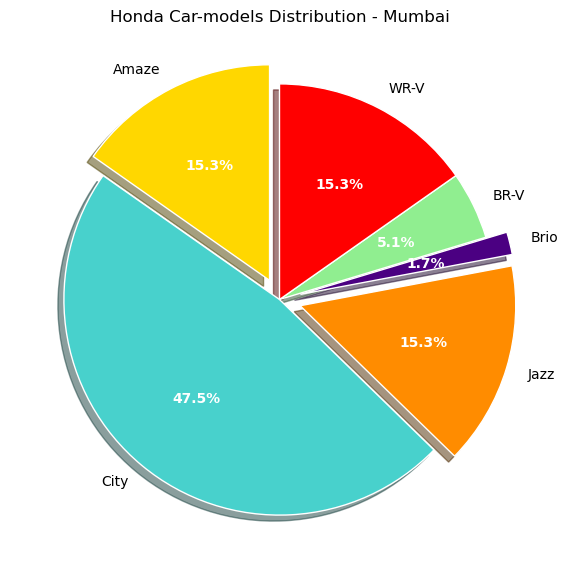

In [6]:
### PIE CHART - MUMBAI ###

# Creating explode data
explode = (0.1, 0.0, 0.1, 0.1, 0.0, 0.0)
#explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

# Creating color parameters
#colors = ("orange", "brown", "green", "indigo", "red", "lightblue")
colors = ["gold", "mediumturquoise", "darkorange", "indigo", "lightgreen", "red"]

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "white"}

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct)

# Creating plot
fig, ax = plt.subplots(figsize=(10,7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  explode=explode,
                                  labels=models,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="k"))

plt.setp(autotexts, size=10,weight="bold",color="white")
ax.set_title("Honda Car-models Distribution - Mumbai")

# show plot
plt.savefig('Pie_chart.pdf',bbox_inches='tight', pad_inches=0)
plt.show()

#### $\color{violet}\textrm{Number of car vs Year of manufacturing}$

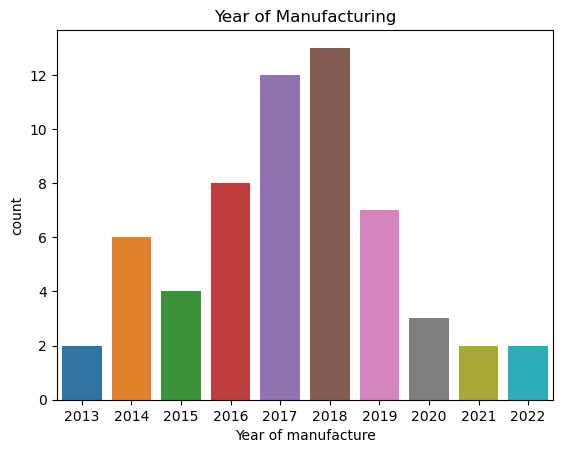

In [7]:
sns.countplot(x='Year of manufacture', data=data_m)
plt.title('Year of Manufacturing')

plt.savefig('Cars_vs_YoM.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

#### $\color{violet}\textrm{Fuel type}$

In [9]:
data_m['Fuel type'].value_counts()

Fuel type
Petrol    56
Diesel     2
CNG        1
Name: count, dtype: int64

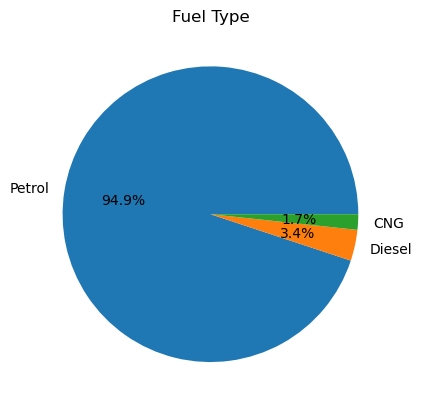

In [10]:
plt.pie(data_m['Fuel type'].value_counts(), labels= ['Petrol', 'Diesel','CNG'], autopct='%1.1f%%')
plt.title('Fuel Type')

plt.savefig('Fuel_type_of_cars.pdf', bbox_inches='tight',pad_inches=0)
plt.show()

#### $\color{violet}\textrm{Transmission type}$

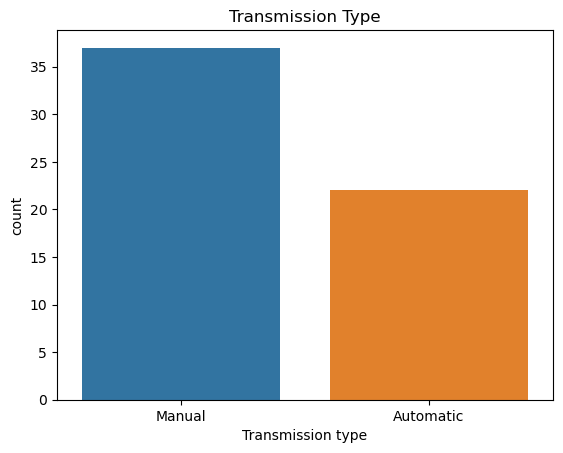

In [14]:
sns.countplot(x='Transmission type', data=data_m)
plt.title('Transmission Type')
plt.savefig('Transmission_type_of_cars.pdf', bbox_inches='tight',pad_inches=0)
plt.show()

#### $\color{violet}\textrm{Model vs price}$

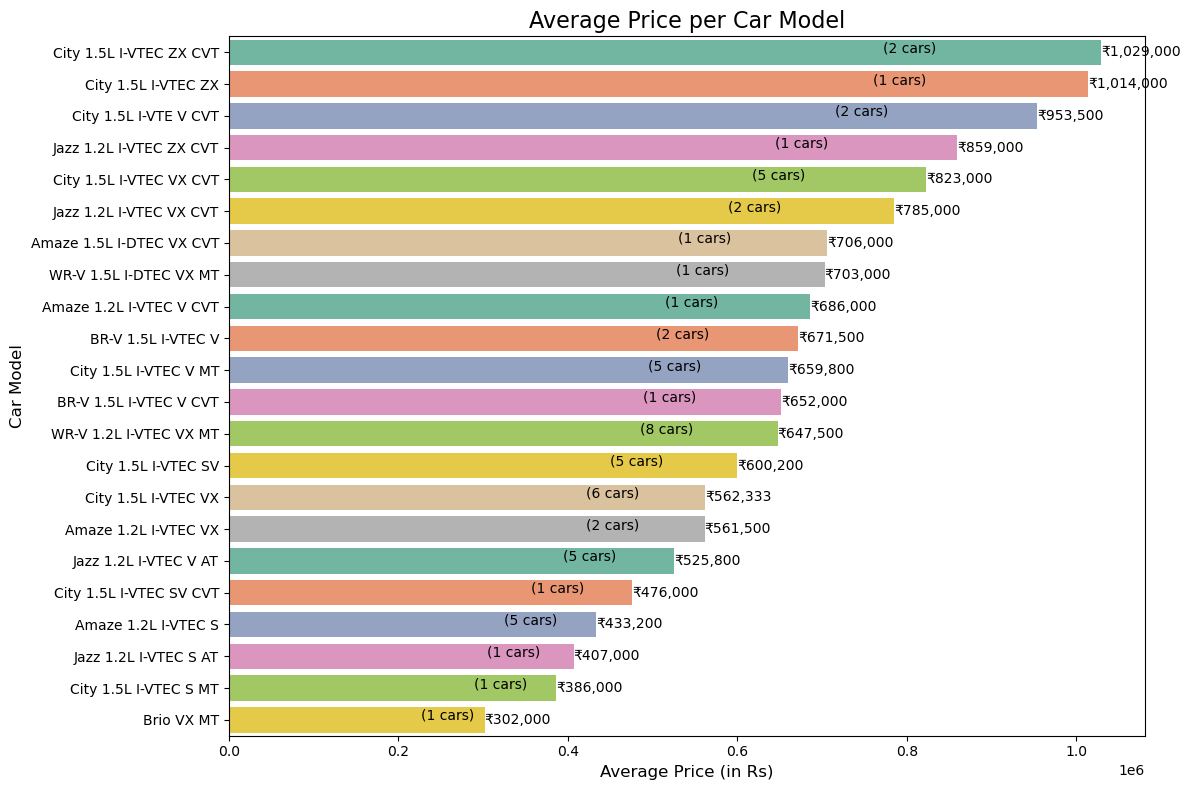

In [20]:
avg_price = data_m.groupby('Model')['Price (in Rs)'].mean().reset_index()

# Count the number of cars for each model
model_counts = data_m['Model'].value_counts().reset_index()
model_counts.columns = ['Model', 'Count']

# Merging the count data with the average price
avg_price = pd.merge(avg_price, model_counts, on='Model')

# Sort by average price for better readability
avg_price = avg_price.sort_values('Price (in Rs)', ascending=False)

# Generate a color palette for each car model
colors = sns.color_palette("Set2", len(avg_price))

# Plotting a horizontal bar chart with unique colors for each model
plt.figure(figsize=(12, 8))
sns.barplot(x='Price (in Rs)', y='Model', data=avg_price, palette=colors)

# Adding value annotations on the bars (show price)
for index, value in enumerate(avg_price['Price (in Rs)']):
    plt.text(value, index, f'₹{int(value):,}', va='center', fontsize=10)

# Adding the count of cars next to the model name
for i in range(len(avg_price)):
    plt.text(avg_price['Price (in Rs)'].iloc[i] * 0.75, i, f"({avg_price['Count'].iloc[i]} cars)", color='black', fontsize=10)

# Add titles and labels
plt.title('Average Price per Car Model', fontsize=16)
plt.xlabel('Average Price (in Rs)', fontsize=12)
plt.ylabel('Car Model', fontsize=12)
plt.tight_layout()

# Show plot
plt.savefig('Average_prices_of_cars.pdf', bbox_inches='tight',pad_inches=0)
plt.show()

#### $\color{violet}\textrm{Price vs YoM}$

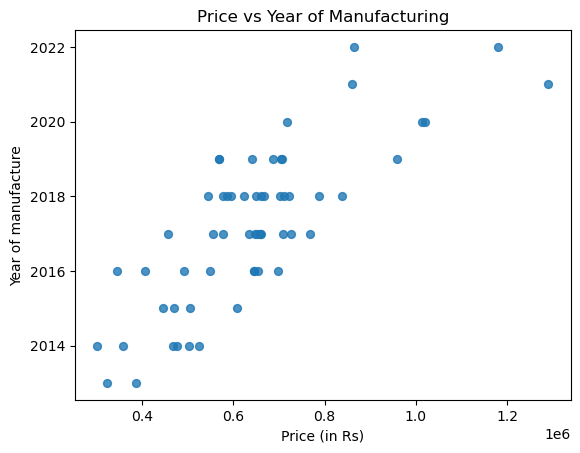

In [21]:
data_m.plot(kind='scatter', x='Price (in Rs)', y='Year of manufacture', s=32, alpha=.8)
plt.title('Price vs Year of Manufacturing')
plt.savefig('Prices_vs_YoM.pdf', bbox_inches='tight',pad_inches=0)
plt.show()

#### $\color{violet}\textrm{Price vs Km drivens}$

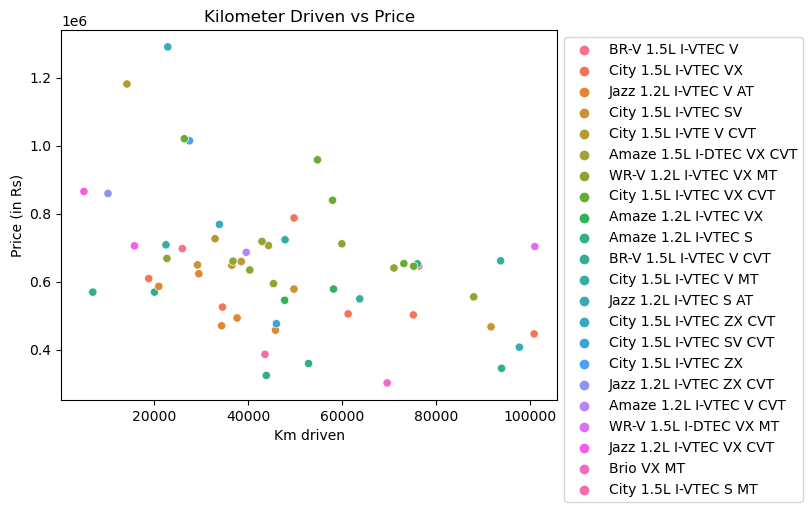

In [33]:
sns.scatterplot(x='Km driven', y='Price (in Rs)', hue='Model', data=data_m)
plt.title('Kilometer Driven vs Price')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.savefig('Km_driven_vs_price.pdf', bbox_inches='tight',pad_inches=0)
plt.show()

#### $\color{violet}\textrm{Km driven distribution}$

/home/srikanta/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


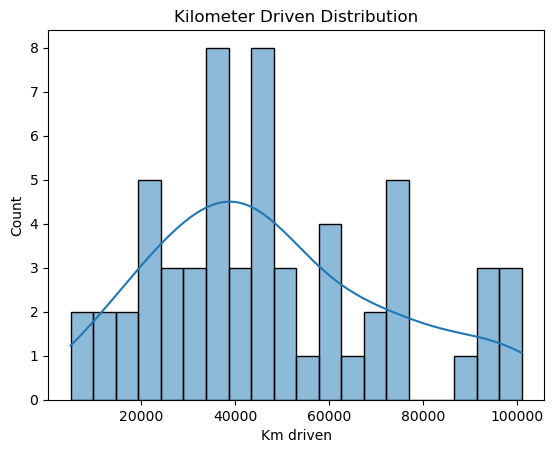

In [34]:
sns.histplot(data_m['Km driven'], bins=20, kde=True)
plt.title('Kilometer Driven Distribution')
plt.savefig('km_driven_dist.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

#### $\color{violet}\textrm{Price distribution}$

/home/srikanta/anaconda3/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


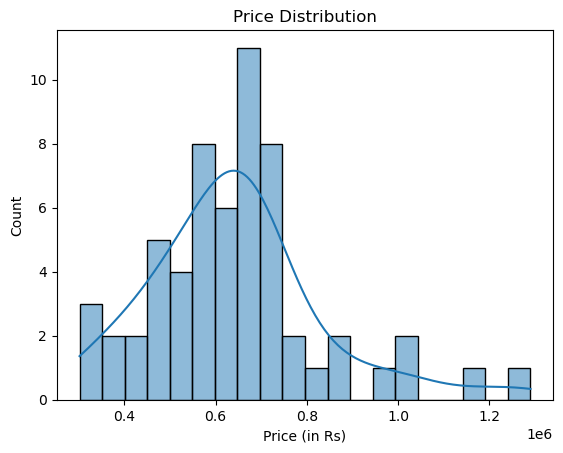

In [35]:
sns.histplot(data_m['Price (in Rs)'], bins=20, kde=True)
plt.title('Price Distribution')
plt.savefig('price_dist.pdf',bbox_inches='tight',pad_inches=0)
plt.show()